In [664]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [665]:
# CREATE
# A Series is, in essence, a single column of a DataFrame. 
ts = pd.Series(
    [1, 3, 5, np.nan, 6, 8], 
    name='Series',
    index=list(range(10, 16))
)
print(ts)

bool_series  = pd.Series(
    [False, True, False], 
    name='Bool Series',
    index=[1,2,3]
)
print(bool_series)
try:
    if bool_series:
        print('True')
except BaseException as err:
    print(err)

if not bool_series.empty:
    print('Not empty')

if pd.Series([True]).bool():
    print('True')

if bool_series.any():
    print('any')

if not bool_series.all():
    print('Not all')

if bool_series is not None:
    print('Not none')

10    1.0
11    3.0
12    5.0
13    NaN
14    6.0
15    8.0
Name: Series, dtype: float64
1    False
2     True
3    False
Name: Bool Series, dtype: bool
The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
Not empty
True
any
Not all
Not none


In [666]:
# help
bool_series?

Type:        Series
String form:
1    False
2     True
3    False
Name: Bool Series, dtype: bool
Length:      3
File:        ~/Documents/python/DS/pandas/venv-ds/lib/python3.10/site-packages/pandas/core/series.py
Docstring:  
One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, \*, \*\*) align values based on their
associated index values-- they need not be the same length. The result
index will be the sorted union of the two indexes.

Parameters
----------
data : array-like, Iterable, dict, or scalar value
    Contains data stored in Series. If data is a dict, argument order is
    maintained.
index : array-like or Index (1d

In [667]:
# A DataFrame is a table. It contains an array of individual entries, each of which has a certain value. 
dates = pd.date_range("20130101", periods=6)
frame_rand = pd.DataFrame(
    np.random.randn(6, 3), 
    index=dates, 
    columns=list('ABC')
)
frame_rand

,A,B,C
2013-01-01,-0.847121,0.319816,-0.184396
2013-01-02,0.708360,0.481106,-1.497899
2013-01-03,0.761710,-0.548346,1.365318
2013-01-04,0.835605,-0.015054,0.027033
2013-01-05,0.180583,-1.087668,0.291857
2013-01-06,-0.828039,0.055132,-0.433054


In [668]:
# DataFrame as actually being just a bunch of Series "glued together".
frame_dict = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
# series
print(frame_dict.B)
print(type(frame_dict.B))

print(frame_dict.D.describe())
print(frame_dict.E.describe())

print(frame_dict.describe())
print(frame_dict)

0   2013-01-02
1   2013-01-02
2   2013-01-02
3   2013-01-02
Name: B, dtype: datetime64[ns]
<class 'pandas.core.series.Series'>
count    4.0
mean     3.0
std      0.0
min      3.0
25%      3.0
50%      3.0
75%      3.0
max      3.0
Name: D, dtype: float64
count        4
unique       2
top       test
freq         2
Name: E, dtype: object
         A    C    D
count  4.0  4.0  4.0
mean   1.0  1.0  3.0
std    0.0  0.0  0.0
min    1.0  1.0  3.0
25%    1.0  1.0  3.0
50%    1.0  1.0  3.0
75%    1.0  1.0  3.0
max    1.0  1.0  3.0
     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


In [669]:
print(frame_dict.D.value_counts())
print(frame_dict.E.unique())

3    4
Name: D, dtype: int64
['test', 'train']
Categories (2, object): ['test', 'train']


In [670]:
max_c = frame_dict.max(skipna=True, numeric_only=True).C
min_c = frame_dict.min(skipna=True, numeric_only=True).C
print(max_c, min_c)

1.0 1.0


In [671]:
idx_max = (frame_dict.C / frame_dict.D).idxmax()
print(idx_max)
frame_dict.loc[idx_max, 'C']

0


1.0

In [672]:
# INFO
print(frame_dict.dtypes)


A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


In [673]:
# index type
print(frame_dict.index.dtype)
# column type
print(frame_dict.B.dtype)
# cast
print(frame_dict.D.astype('float64'))

int64
datetime64[ns]
0    3.0
1    3.0
2    3.0
3    3.0
Name: D, dtype: float64


In [674]:
frame_rand.describe()


,A,B,C
count,6.000000,6.000000,6.000000
mean,0.135183,-0.132502,-0.071857
std,0.788218,0.585726,0.936404
min,-0.847121,-1.087668,-1.497899
25%,-0.575884,-0.415023,-0.370890
50%,0.444471,0.020039,-0.078681
75%,0.748372,0.253645,0.225651
max,0.835605,0.481106,1.365318


In [675]:
frame_rand.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
dtypes: float64(3)
memory usage: 192.0 bytes


In [676]:
frame_rand.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
dtypes: float64(3)
memory usage: 192.0 bytes


In [677]:
# VIEW
print(
    frame_rand.head(1).A[0], 
    type(frame_rand.head(1).A[0]),
    frame_rand.head(1).A.iloc[0]
)
frame_rand.head()

-0.8471207592958976 <class 'numpy.float64'> -0.8471207592958976


,A,B,C
2013-01-01,-0.847121,0.319816,-0.184396
2013-01-02,0.708360,0.481106,-1.497899
2013-01-03,0.761710,-0.548346,1.365318
2013-01-04,0.835605,-0.015054,0.027033
2013-01-05,0.180583,-1.087668,0.291857


In [678]:
frame_rand.tail()

,A,B,C
2013-01-02,0.708360,0.481106,-1.497899
2013-01-03,0.761710,-0.548346,1.365318
2013-01-04,0.835605,-0.015054,0.027033
2013-01-05,0.180583,-1.087668,0.291857
2013-01-06,-0.828039,0.055132,-0.433054


In [679]:
# x
frame_rand.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [680]:
# y
frame_rand.columns

Index(['A', 'B', 'C'], dtype='object')

In [681]:
# heavy
# does not include the index or column labels in the output.
frame_rand.to_numpy()

array([[-0.84712076,  0.31981643, -0.18439578],
       [ 0.70835958,  0.48110572, -1.49789925],
       [ 0.76171006, -0.54834569,  1.36531812],
       [ 0.8356047 , -0.01505366,  0.02703328],
       [ 0.18058262, -1.08766805,  0.29185661],
       [-0.82803924,  0.05513176, -0.43305429]])

In [682]:
# heavy
# does not include the index or column labels in the output.
frame_dict.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [683]:
frame_rand.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.847121,0.708360,0.761710,0.835605,0.180583,-0.828039
B,0.319816,0.481106,-0.548346,-0.015054,-1.087668,0.055132
C,-0.184396,-1.497899,1.365318,0.027033,0.291857,-0.433054


In [684]:
# sort by x (index)
frame_rand.sort_index(axis=0, ascending=False)

,A,B,C
2013-01-06,-0.828039,0.055132,-0.433054
2013-01-05,0.180583,-1.087668,0.291857
2013-01-04,0.835605,-0.015054,0.027033
2013-01-03,0.761710,-0.548346,1.365318
2013-01-02,0.708360,0.481106,-1.497899
2013-01-01,-0.847121,0.319816,-0.184396


In [685]:
# sort by y (columns)
frame_rand.sort_index(axis=1, ascending=False)

,C,B,A
2013-01-01,-0.184396,0.319816,-0.847121
2013-01-02,-1.497899,0.481106,0.708360
2013-01-03,1.365318,-0.548346,0.761710
2013-01-04,0.027033,-0.015054,0.835605
2013-01-05,0.291857,-1.087668,0.180583
2013-01-06,-0.433054,0.055132,-0.828039


In [686]:
frame_rand.sort_values(by='B')

,A,B,C
2013-01-05,0.180583,-1.087668,0.291857
2013-01-03,0.761710,-0.548346,1.365318
2013-01-04,0.835605,-0.015054,0.027033
2013-01-06,-0.828039,0.055132,-0.433054
2013-01-01,-0.847121,0.319816,-0.184396
2013-01-02,0.708360,0.481106,-1.497899


In [687]:
# SELECTION
# For production code, we recommend the optimized pandas data access methods, DataFrame.at(), DataFrame.iat(), DataFrame.loc() and DataFrame.iloc().

# columns (series)
print(frame_rand.A[0], type(frame_rand.A[0]))
frame_rand.A


-0.8471207592958976 <class 'numpy.float64'>


2013-01-01   -0.847121
2013-01-02    0.708360
2013-01-03    0.761710
2013-01-04    0.835605
2013-01-05    0.180583
2013-01-06   -0.828039
Freq: D, Name: A, dtype: float64

In [688]:
# columns (series)
frame_rand['B']

2013-01-01    0.319816
2013-01-02    0.481106
2013-01-03   -0.548346
2013-01-04   -0.015054
2013-01-05   -1.087668
2013-01-06    0.055132
Freq: D, Name: B, dtype: float64

In [689]:
# rows
frame_rand[:2]

,A,B,C
2013-01-01,-0.847121,0.319816,-0.184396
2013-01-02,0.708360,0.481106,-1.497899


In [690]:
# rows
frame_rand['20130102': '20130104']

,A,B,C
2013-01-02,0.708360,0.481106,-1.497899
2013-01-03,0.761710,-0.548346,1.365318
2013-01-04,0.835605,-0.015054,0.027033


In [691]:
# by label
# loc use indexes inclusively 0:10 will select entries 0,...,10.
# frame_rand.loc['20130101']
frame_rand.loc[dates[0]]

A   -0.847121
B    0.319816
C   -0.184396
Name: 2013-01-01 00:00:00, dtype: float64

In [692]:
# rows, columns
frame_rand.loc['20130102': '20130104', 'A':'C']

,A,B,C
2013-01-02,0.708360,0.481106,-1.497899
2013-01-03,0.761710,-0.548346,1.365318
2013-01-04,0.835605,-0.015054,0.027033


In [693]:
# rows, columns
frame_rand.loc[:, 'A': 'C']

,A,B,C
2013-01-01,-0.847121,0.319816,-0.184396
2013-01-02,0.708360,0.481106,-1.497899
2013-01-03,0.761710,-0.548346,1.365318
2013-01-04,0.835605,-0.015054,0.027033
2013-01-05,0.180583,-1.087668,0.291857
2013-01-06,-0.828039,0.055132,-0.433054


In [694]:
frame_rand.loc['20130102': '20130104', :]

,A,B,C
2013-01-02,0.708360,0.481106,-1.497899
2013-01-03,0.761710,-0.548346,1.365318
2013-01-04,0.835605,-0.015054,0.027033


In [695]:
frame_rand.loc[['20130101', '20130102'], ['A', 'C']]

,A,C
2013-01-01,-0.847121,-0.184396
2013-01-02,0.708360,-1.497899


In [696]:
frame_rand.loc['20130102', :'C']

A    0.708360
B    0.481106
C   -1.497899
Name: 2013-01-02 00:00:00, dtype: float64

In [697]:
frame_rand.loc['20130102', ['A', 'C']]

A    0.708360
C   -1.497899
Name: 2013-01-02 00:00:00, dtype: float64

In [698]:
frame_rand.loc[dates[0], 'A']

-0.8471207592958976

In [699]:
frame_rand.at[dates[0], 'A']

-0.8471207592958976

In [700]:
# by index
# uses the Python stdlib indexing scheme 0:10 will select entries 0,...,9
frame_rand.iloc[3]

A    0.835605
B   -0.015054
C    0.027033
Name: 2013-01-04 00:00:00, dtype: float64

In [701]:
frame_rand.iloc[-2]

A    0.180583
B   -1.087668
C    0.291857
Name: 2013-01-05 00:00:00, dtype: float64

In [702]:
frame_rand.iloc[3:5, 0:2]

,A,B
2013-01-04,0.835605,-0.015054
2013-01-05,0.180583,-1.087668


In [703]:
frame_rand.iloc[1:3, :]

,A,B,C
2013-01-02,0.70836,0.481106,-1.497899
2013-01-03,0.76171,-0.548346,1.365318


In [704]:
frame_rand.iloc[:, 1:3]

,B,C
2013-01-01,0.319816,-0.184396
2013-01-02,0.481106,-1.497899
2013-01-03,-0.548346,1.365318
2013-01-04,-0.015054,0.027033
2013-01-05,-1.087668,0.291857
2013-01-06,0.055132,-0.433054


In [705]:
frame_rand.iloc[[1,2,4], [0,2]]

,A,C
2013-01-02,0.708360,-1.497899
2013-01-03,0.761710,1.365318
2013-01-05,0.180583,0.291857


In [706]:
frame_rand.iloc[0, :3]

A   -0.847121
B    0.319816
C   -0.184396
Name: 2013-01-01 00:00:00, dtype: float64

In [707]:
frame_rand.iloc[1, [0, 2]]

A    0.708360
C   -1.497899
Name: 2013-01-02 00:00:00, dtype: float64

In [708]:
frame_rand.iloc[1, 1]

0.48110571576157113

In [709]:
print(type(frame_rand.iat[1, 1]))
frame_rand.iat[1, 1]

<class 'numpy.float64'>


0.48110571576157113

In [710]:
# by bool index
frame_rand[frame_rand['A'] > 0]

,A,B,C
2013-01-02,0.708360,0.481106,-1.497899
2013-01-03,0.761710,-0.548346,1.365318
2013-01-04,0.835605,-0.015054,0.027033
2013-01-05,0.180583,-1.087668,0.291857


In [711]:
frame_rand[frame_rand > 0]

,A,B,C
2013-01-01,NaN,0.319816,NaN
2013-01-02,0.708360,0.481106,NaN
2013-01-03,0.761710,NaN,1.365318
2013-01-04,0.835605,NaN,0.027033
2013-01-05,0.180583,NaN,0.291857
2013-01-06,NaN,0.055132,NaN


In [712]:
frame_rand[pd.isnull(frame_rand.C)]

,A,B,C


In [713]:
frame_rand[pd.notnull(frame_rand.C)]

,A,B,C
2013-01-01,-0.847121,0.319816,-0.184396
2013-01-02,0.708360,0.481106,-1.497899
2013-01-03,0.761710,-0.548346,1.365318
2013-01-04,0.835605,-0.015054,0.027033
2013-01-05,0.180583,-1.087668,0.291857
2013-01-06,-0.828039,0.055132,-0.433054


In [714]:
pd.isnull(frame_dict.F).sum()

0

In [715]:
frame_rand_copy = frame_rand.copy()

# Series and DataFrame have comparison methods eq, ne, lt, gt, le, and ge
frame_rand.gt(frame_rand_copy)

,A,B,C
2013-01-01,False,False,False
2013-01-02,False,False,False
2013-01-03,False,False,False
2013-01-04,False,False,False
2013-01-05,False,False,False
2013-01-06,False,False,False


In [716]:
frame_rand.eq(frame_rand_copy)

,A,B,C
2013-01-01,True,True,True
2013-01-02,True,True,True
2013-01-03,True,True,True
2013-01-04,True,True,True
2013-01-05,True,True,True
2013-01-06,True,True,True


In [717]:
# in
ts = pd.Series(range(5), index=list("abcde"))
print(2 in ts)
print('b' in ts)
ts.isin([2])

False
True


a    False
b    False
c     True
d    False
e    False
dtype: bool

In [718]:

frame_rand_copy['D'] = ['one', 'one', 'two', 'three', 'four', 'three']
frame_rand_copy

,A,B,C,D
2013-01-01,-0.847121,0.319816,-0.184396,one
2013-01-02,0.708360,0.481106,-1.497899,one
2013-01-03,0.761710,-0.548346,1.365318,two
2013-01-04,0.835605,-0.015054,0.027033,three
2013-01-05,0.180583,-1.087668,0.291857,four
2013-01-06,-0.828039,0.055132,-0.433054,three


In [719]:
frame_rand_copy[frame_rand_copy['D'].isin(['two', 'four'])]

,A,B,C,D
2013-01-03,0.761710,-0.548346,1.365318,two
2013-01-05,0.180583,-1.087668,0.291857,four


In [720]:
# SETTING
# setting a new column automatically aligns the data by the indexes
new_column = pd.Series(
    list(range(1,7)), index=pd.date_range('20130102', periods=6)
)

frame_rand['F'] = new_column
frame_rand

,A,B,C,F
2013-01-01,-0.847121,0.319816,-0.184396,NaN
2013-01-02,0.708360,0.481106,-1.497899,1.0
2013-01-03,0.761710,-0.548346,1.365318,2.0
2013-01-04,0.835605,-0.015054,0.027033,3.0
2013-01-05,0.180583,-1.087668,0.291857,4.0
2013-01-06,-0.828039,0.055132,-0.433054,5.0


In [721]:
frame_rand.at[dates[0], 'A'] = 0
frame_rand.iat[0, 1] = 0
frame_rand.loc[:, 'C'] =  np.array([5] * len(frame_rand))

frame_rand

/var/folders/df/sx2bgp556_zdmy1sk4fflv_w0000gp/T/ipykernel_1296/914599329.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  frame_rand.loc[:, 'C'] =  np.array([5] * len(frame_rand))


,A,B,C,F
2013-01-01,0.000000,0.000000,5,NaN
2013-01-02,0.708360,0.481106,5,1.0
2013-01-03,0.761710,-0.548346,5,2.0
2013-01-04,0.835605,-0.015054,5,3.0
2013-01-05,0.180583,-1.087668,5,4.0
2013-01-06,-0.828039,0.055132,5,5.0


In [722]:

frame_rand[frame_rand.columns[2]] = np.array([6] * len(frame_rand))
frame_rand

,A,B,C,F
2013-01-01,0.000000,0.000000,6,NaN
2013-01-02,0.708360,0.481106,6,1.0
2013-01-03,0.761710,-0.548346,6,2.0
2013-01-04,0.835605,-0.015054,6,3.0
2013-01-05,0.180583,-1.087668,6,4.0
2013-01-06,-0.828039,0.055132,6,5.0


In [723]:
frame_rand.isetitem(2, np.array([7] * len(frame_rand)))
frame_rand

,A,B,C,F
2013-01-01,0.000000,0.000000,7,NaN
2013-01-02,0.708360,0.481106,7,1.0
2013-01-03,0.761710,-0.548346,7,2.0
2013-01-04,0.835605,-0.015054,7,3.0
2013-01-05,0.180583,-1.087668,7,4.0
2013-01-06,-0.828039,0.055132,7,5.0


In [724]:

frame_rand_copy = frame_rand.copy()
frame_rand_copy[frame_rand > 0] = -frame_rand
frame_rand

,A,B,C,F
2013-01-01,0.000000,0.000000,7,NaN
2013-01-02,0.708360,0.481106,7,1.0
2013-01-03,0.761710,-0.548346,7,2.0
2013-01-04,0.835605,-0.015054,7,3.0
2013-01-05,0.180583,-1.087668,7,4.0
2013-01-06,-0.828039,0.055132,7,5.0


In [725]:
frame_rand.rename(columns={'F': 'FF'})

,A,B,C,FF
2013-01-01,0.000000,0.000000,7,NaN
2013-01-02,0.708360,0.481106,7,1.0
2013-01-03,0.761710,-0.548346,7,2.0
2013-01-04,0.835605,-0.015054,7,3.0
2013-01-05,0.180583,-1.087668,7,4.0
2013-01-06,-0.828039,0.055132,7,5.0


In [726]:
frame_dict.rename(index={0: 'first', 1: 'second'})

,A,B,C,D,E,F
first,1.0,2013-01-02,1.0,3,test,foo
second,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [727]:
# Both the row index and the column index can have their own name attribute. 
frame_dict.rename_axis('X', axis='rows').rename_axis('Y', axis='columns')


Y,A,B,C,D,E,F
X,,,,,,
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [728]:
# MISSING DATA
# pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations
# For technical reasons these NaN values are always of the float64 dtype.

frame_rand.F.fillna(5.0)

2013-01-01    5.0
2013-01-02    1.0
2013-01-03    2.0
2013-01-04    3.0
2013-01-05    4.0
2013-01-06    5.0
Freq: D, Name: F, dtype: float64

In [729]:
frame_dict.F.replace('foo', 'FOO')

0    FOO
1    FOO
2    FOO
3    FOO
Name: F, dtype: object

In [730]:
# reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data
frame_rand_reindex = frame_rand.reindex(
    index=dates[:4], columns=list(frame_rand.columns) + ['E']
)
frame_rand_reindex.loc[dates[0]: dates[1], 'E'] = 1
frame_rand_reindex

,A,B,C,F,E
2013-01-01,0.000000,0.000000,7,NaN,1.0
2013-01-02,0.708360,0.481106,7,1.0,1.0
2013-01-03,0.761710,-0.548346,7,2.0,NaN
2013-01-04,0.835605,-0.015054,7,3.0,NaN


In [731]:
frame_rand_reindex.dropna(how='any')

,A,B,C,F,E
2013-01-02,0.70836,0.481106,7,1.0,1.0


In [732]:
frame_rand_reindex.fillna(value=5)

,A,B,C,F,E
2013-01-01,0.000000,0.000000,7,5.0,1.0
2013-01-02,0.708360,0.481106,7,1.0,1.0
2013-01-03,0.761710,-0.548346,7,2.0,5.0
2013-01-04,0.835605,-0.015054,7,3.0,5.0


In [733]:
pd.isna(frame_rand_reindex)

,A,B,C,F,E
2013-01-01,False,False,False,True,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


In [734]:
frame_rand.set_index('A')

,B,C,F
A,,,
0.000000,0.000000,7,NaN
0.708360,0.481106,7,1.0
0.761710,-0.548346,7,2.0
0.835605,-0.015054,7,3.0
0.180583,-1.087668,7,4.0
-0.828039,0.055132,7,5.0


In [735]:
# OPERATIONS
# operations in general exclude missing data.

# stats
ft = pd.DataFrame([[1,2,3], [2,4,8], [16,32,64]])
print(ft)
print(f'mean: {ft.mean()}')
print(f'median: {ft.median()}')



    0   1   2
0   1   2   3
1   2   4   8
2  16  32  64
mean: 0     6.333333
1    12.666667
2    25.000000
dtype: float64
median: 0    2.0
1    4.0
2    8.0
dtype: float64


In [736]:
frame_rand.mean()

A    0.276370
B   -0.185805
C    7.000000
F    3.000000
dtype: float64

In [737]:
# x (index)
frame_rand.mean(axis=0)

A    0.276370
B   -0.185805
C    7.000000
F    3.000000
dtype: float64

In [738]:
# y (column)
frame_rand.mean(1)

2013-01-01    2.333333
2013-01-02    2.297366
2013-01-03    2.303341
2013-01-04    2.705138
2013-01-05    2.523229
2013-01-06    2.806773
Freq: D, dtype: float64

In [739]:
# operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

series_rand = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

frame_rand.sub(series_rand, axis='index')

,A,B,C,F
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.238290,-1.548346,6.0,1.0
2013-01-04,-2.164395,-3.015054,4.0,0.0
2013-01-05,-4.819417,-6.087668,2.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN


In [740]:
# map
print(frame_rand.C.map(lambda x: x + 1))
print(frame_rand.C - 1)
# apply
frame_rand.apply(np.cumsum, axis=0)

2013-01-01    8
2013-01-02    8
2013-01-03    8
2013-01-04    8
2013-01-05    8
2013-01-06    8
Freq: D, Name: C, dtype: int64
2013-01-01    6
2013-01-02    6
2013-01-03    6
2013-01-04    6
2013-01-05    6
2013-01-06    6
Freq: D, Name: C, dtype: int64


,A,B,C,F
2013-01-01,0.000000,0.000000,7,NaN
2013-01-02,0.708360,0.481106,14,1.0
2013-01-03,1.470070,-0.067240,21,3.0
2013-01-04,2.305674,-0.082294,28,6.0
2013-01-05,2.486257,-1.169962,35,10.0
2013-01-06,1.658218,-1.114830,42,15.0


In [741]:
# frame_rand.max() - frame_rand.min() 
frame_rand.apply(lambda x: x.max() - x.min())

A    1.663644
B    1.568774
C    0.000000
F    4.000000
dtype: float64

In [742]:
# histogramming
frame_rand.loc[:, 'A'].value_counts()

 0.000000    1
 0.708360    1
 0.761710    1
 0.835605    1
 0.180583    1
-0.828039    1
Name: A, dtype: int64

In [743]:
pd.Series(np.random.randint(0, 7, size=10)).value_counts()

4    4
6    2
1    2
3    1
0    1
dtype: int64

In [744]:
# string
string = pd.Series(
    ["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"]
)
string.str.lower()


0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [745]:
string.str.upper()

0       A
1       B
2       C
3    AABA
4    BACA
5     NaN
6    CABA
7     DOG
8     CAT
dtype: object

In [746]:
string.str.capitalize()

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    Caba
7     Dog
8     Cat
dtype: object

In [747]:
# MERGE
# adding a column to a DataFrame is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the DataFrame constructor instead of building a DataFrame by iteratively appending records to it.
ft = pd.DataFrame(np.random.randn(10, 4))
ft

,0,1,2,3
0,-0.585321,-1.944583,1.819671,-0.493308
1,0.246253,-0.030802,0.236891,0.670220
2,-0.339794,-0.017255,0.102794,0.080006
3,-1.292141,0.795511,-1.065788,0.342749
4,-0.642790,0.417114,1.323212,1.230202
5,0.034230,-0.649454,-0.691442,-0.779903
6,-0.017016,0.536400,-1.150949,-0.441644
7,0.214887,0.740472,-0.889738,-1.472753
8,-1.367158,-0.415569,0.474912,-0.057682
9,-0.942754,0.396229,-1.140374,0.324236


In [748]:
pieces = [ft[:3], ft[3:7], ft[7:]]
pieces

[          0         1         2         3
 0 -0.585321 -1.944583  1.819671 -0.493308
 1  0.246253 -0.030802  0.236891  0.670220
 2 -0.339794 -0.017255  0.102794  0.080006,
           0         1         2         3
 3 -1.292141  0.795511 -1.065788  0.342749
 4 -0.642790  0.417114  1.323212  1.230202
 5  0.034230 -0.649454 -0.691442 -0.779903
 6 -0.017016  0.536400 -1.150949 -0.441644,
           0         1         2         3
 7  0.214887  0.740472 -0.889738 -1.472753
 8 -1.367158 -0.415569  0.474912 -0.057682
 9 -0.942754  0.396229 -1.140374  0.324236]

In [749]:
# concat
pd.concat(pieces)

,0,1,2,3
0,-0.585321,-1.944583,1.819671,-0.493308
1,0.246253,-0.030802,0.236891,0.670220
2,-0.339794,-0.017255,0.102794,0.080006
3,-1.292141,0.795511,-1.065788,0.342749
4,-0.642790,0.417114,1.323212,1.230202
5,0.034230,-0.649454,-0.691442,-0.779903
6,-0.017016,0.536400,-1.150949,-0.441644
7,0.214887,0.740472,-0.889738,-1.472753
8,-1.367158,-0.415569,0.474912,-0.057682
9,-0.942754,0.396229,-1.140374,0.324236


In [750]:
# join
# enables SQL style join types along specific columns.
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left


,key,lval
0,foo,1
1,foo,2


In [751]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [752]:
right.join(left, lsuffix='_R', rsuffix='_L')

,key_R,rval,key_L,lval
0,foo,4,foo,1
1,foo,5,foo,2


In [753]:
# merge
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [754]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [755]:
# GROUP
# Splitting the data into groups based on some criteria
# Applying a function to each group independently
# Combining the results into a data structure

ft = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
ft

,A,B,C,D
0,foo,one,-1.999871,0.657762
1,bar,one,1.052294,0.515992
2,foo,two,0.339285,0.848719
3,bar,three,1.956005,-0.426769
4,foo,two,2.348832,0.053979
5,bar,two,-0.076004,0.754889
6,foo,one,-0.432644,0.622214
7,foo,three,-0.089969,1.195279


In [756]:
# value_counts() is just a shortcut to this groupby() operation
print(ft.B.value_counts())
print(ft.groupby('B').D.count())

one      3
two      3
three    2
Name: B, dtype: int64
B
one      3
three    2
two      3
Name: D, dtype: int64


In [757]:
ft.groupby('A')[['C', 'D']].value_counts()

A    C          D        
bar  -0.076004   0.754889    1
      1.052294   0.515992    1
      1.956005  -0.426769    1
foo  -1.999871   0.657762    1
     -0.432644   0.622214    1
     -0.089969   1.195279    1
      0.339285   0.848719    1
      2.348832   0.053979    1
dtype: int64

In [758]:
ft.groupby('A').apply(
    lambda df: df.C.loc[df.C.idxmax()]
)

A
bar    1.956005
foo    2.348832
dtype: float64

In [759]:
ft.groupby('A').C.agg(['min','max'])

,min,max
A,,
bar,-0.076004,1.956005
foo,-1.999871,2.348832


In [760]:
mu = ft.groupby(['A', 'B']).C.agg(['min','max'])
print(mu.head(3))
print(type(mu.index))

                min       max
A   B                        
bar one    1.052294  1.052294
    three  1.956005  1.956005
    two   -0.076004 -0.076004
<class 'pandas.core.indexes.multi.MultiIndex'>


In [761]:
mu.reset_index()

,A,B,min,max
0,bar,one,1.052294,1.052294
1,bar,three,1.956005,1.956005
2,bar,two,-0.076004,-0.076004
3,foo,one,-1.999871,-0.432644
4,foo,three,-0.089969,-0.089969
5,foo,two,0.339285,2.348832


In [762]:
ft.groupby('A')[['C', 'D']].sum()

,C,D
A,,
bar,2.932296,0.844111
foo,0.165633,3.377953


In [763]:
ft.groupby(['A', 'B']).value_counts()

A    B      C          D        
bar  one     1.052294   0.515992    1
     three   1.956005  -0.426769    1
     two    -0.076004   0.754889    1
foo  one    -1.999871   0.657762    1
            -0.432644   0.622214    1
     three  -0.089969   1.195279    1
     two     0.339285   0.848719    1
             2.348832   0.053979    1
dtype: int64

In [764]:
ft.groupby(['A', 'B']).count()

C  D
A   B          
bar one    1  1
    three  1  1
    two    1  1
foo one    2  2
    three  1  1
    two    2  2

In [765]:
ft.groupby(['A', 'B']).size()

A    B    
bar  one      1
     three    1
     two      1
foo  one      2
     three    1
     two      2
dtype: int64

In [766]:
ft.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    1.052294  0.515992
    three  1.956005 -0.426769
    two   -0.076004  0.754889
foo one   -2.432514  1.279976
    three -0.089969  1.195279
    two    2.688117  0.902698

In [767]:
# RESHAPE

# stack
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)
tuples


[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [768]:
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
ft = pd.DataFrame(np.random.randn(8, 2), index=multi_index, columns=['A', 'B'])

ft2 = ft[:4]
ft2

A         B
first second                    
bar   one     1.488264  0.127186
      two     0.298349 -0.291354
baz   one    -1.352162  1.068035
      two     0.083350 -0.965716

In [769]:
stacked = ft2.stack()
stacked

first  second   
bar    one     A    1.488264
               B    0.127186
       two     A    0.298349
               B   -0.291354
baz    one     A   -1.352162
               B    1.068035
       two     A    0.083350
               B   -0.965716
dtype: float64

In [770]:
# with a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level.
stacked.unstack()

A         B
first second                    
bar   one     1.488264  0.127186
      two     0.298349 -0.291354
baz   one    -1.352162  1.068035
      two     0.083350 -0.965716

In [771]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.488264 -1.352162
       B  0.127186  1.068035
two    A  0.298349  0.083350
       B -0.291354 -0.965716

In [772]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.488264  0.298349
      B  0.127186 -0.291354
baz   A -1.352162  0.083350
      B  1.068035 -0.965716

In [773]:
# pivot
ft = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
ft

,A,B,C,D,E
0,one,A,foo,1.552300,-0.512629
1,one,B,foo,0.652843,-0.241339
2,two,C,foo,0.872578,0.402958
3,three,A,bar,0.746277,0.302128
4,one,B,bar,0.417413,0.001843
5,one,C,bar,-1.115783,1.738688
6,two,A,foo,0.394366,0.129843
7,three,B,foo,-1.229274,-0.122167
8,one,C,foo,0.310513,0.384177
9,one,A,bar,-1.146658,0.789185


In [774]:
# pivot_table() pivots a DataFrame specifying the values, index and columns
pd.pivot_table(ft, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -1.146658  1.552300
      B  0.417413  0.652843
      C -1.115783  0.310513
three A  0.746277       NaN
      B       NaN -1.229274
      C -0.270222       NaN
two   A       NaN  0.394366
      B -0.759823       NaN
      C       NaN  0.872578

In [775]:
# TIME SERIES
# resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data)
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts_resample = ts.resample('5Min').sum()
ts_resample

2012-01-01    24491
Freq: 5T, dtype: int64

In [776]:
ts.sum() == ts_resample

2012-01-01    True
Freq: 5T, dtype: bool

In [777]:
# Series.tz_localize() localizes a time series to a time zone
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.777151
2012-03-07   -0.763755
2012-03-08   -0.861464
2012-03-09   -0.463111
2012-03-10    0.609383
Freq: D, dtype: float64

In [778]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.777151
2012-03-07 00:00:00+00:00   -0.763755
2012-03-08 00:00:00+00:00   -0.861464
2012-03-09 00:00:00+00:00   -0.463111
2012-03-10 00:00:00+00:00    0.609383
Freq: D, dtype: float64

In [779]:
# Series.tz_convert() converts a timezones series to another time zone
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.777151
2012-03-06 19:00:00-05:00   -0.763755
2012-03-07 19:00:00-05:00   -0.861464
2012-03-08 19:00:00-05:00   -0.463111
2012-03-09 19:00:00-05:00    0.609383
Freq: D, dtype: float64

In [780]:
# converting between time span representations
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.301676
2012-02-29    0.569046
2012-03-31    0.777038
2012-04-30    0.914321
2012-05-31   -0.386215
Freq: M, dtype: float64

In [781]:
ps = ts.to_period()
ps

2012-01   -0.301676
2012-02    0.569046
2012-03    0.777038
2012-04    0.914321
2012-05   -0.386215
Freq: M, dtype: float64

In [782]:
ps.to_timestamp()

2012-01-01   -0.301676
2012-02-01    0.569046
2012-03-01    0.777038
2012-04-01    0.914321
2012-05-01   -0.386215
Freq: MS, dtype: float64

In [783]:
# Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end
prng = pd.period_range('1998Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

1998Q1    0.301163
1998Q2    0.975775
1998Q3   -1.326492
1998Q4   -0.050274
1999Q1   -1.028080
1999Q2    1.341487
1999Q3    1.319986
1999Q4    0.239704
2000Q1   -0.623474
2000Q2    0.215697
2000Q3   -0.448406
2000Q4    0.074789
Freq: Q-NOV, dtype: float64

In [784]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1998-03-01 09:00    0.301163
1998-06-01 09:00    0.975775
1998-09-01 09:00   -1.326492
1998-12-01 09:00   -0.050274
1999-03-01 09:00   -1.028080
Freq: H, dtype: float64

In [785]:
# CATEGORICALS
ft = pd.DataFrame(
    {'id': [1, 2, 3, 4, 5, 6], 'raw_grade': ['a', 'b', 'b', 'a', 'a', 'e']}
)
ft.dtypes

id            int64
raw_grade    object
dtype: object

In [786]:
# set category
ft['grade'] = ft['raw_grade'].astype('category')
ft['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [787]:
ft.dtypes

id              int64
raw_grade      object
grade        category
dtype: object

In [788]:
# rename the categories to more meaningful names
new_categories = ["very good", "good", "very bad"]

ft['grade'] = ft['grade'].cat.rename_categories(new_categories)
ft

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [789]:
# reorder the categories and simultaneously add the missing categories (methods under Series.cat() return a new Series by default
ft['grade'] = ft['grade'].cat.set_categories(
    ['very bad', 'bad', 'medium', 'good', 'very good']
)
ft['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [790]:
ft.sort_values(by='grade',ascending=False)

,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,very bad


In [791]:
ft.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [792]:
# PLOTTING
import matplotlib.pyplot as plt
# plt.close method is used to close a figure window
plt.close('all')

<Axes: >

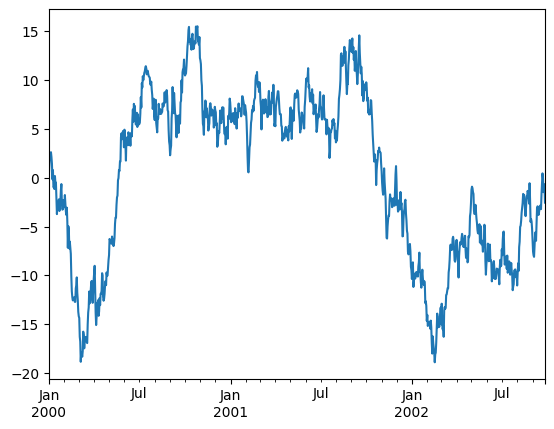

In [793]:
ts = pd.Series(
    np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000)
)
ts = ts.cumsum()
ts.plot()
# If running under Jupyter Notebook, the plot will appear on plot(). Otherwise use matplotlib.pyplot.show to show it or matplotlib.pyplot.savefig to write it to a file.

<Figure size 640x480 with 0 Axes>

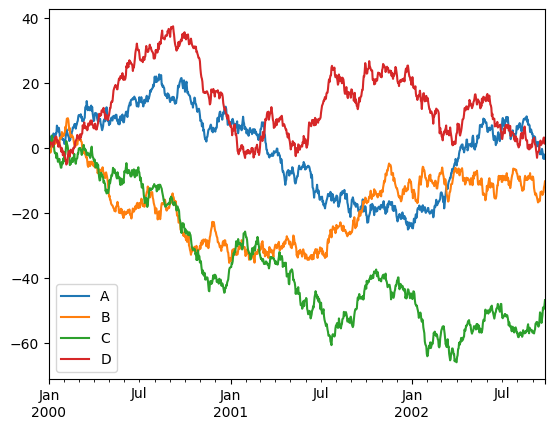

In [794]:
ft = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D']
)
ft = ft.cumsum()
plt.figure()
ft.plot()
plt.legend(loc='best')


In [795]:
# IMPORT EXPORT
# csv
frame_rand.to_csv('frame_rand.csv')
pd.read_csv('frame_rand.csv', index_col=0)

,A,B,C,F
2013-01-01,0.000000,0.000000,7,NaN
2013-01-02,0.708360,0.481106,7,1.0
2013-01-03,0.761710,-0.548346,7,2.0
2013-01-04,0.835605,-0.015054,7,3.0
2013-01-05,0.180583,-1.087668,7,4.0
2013-01-06,-0.828039,0.055132,7,5.0


In [796]:
# hdf5
frame_rand.to_hdf('frame_rand.h5', 'df')
pd.read_hdf('frame_rand.h5', 'df')

,A,B,C,F
2013-01-01,0.000000,0.000000,7,NaN
2013-01-02,0.708360,0.481106,7,1.0
2013-01-03,0.761710,-0.548346,7,2.0
2013-01-04,0.835605,-0.015054,7,3.0
2013-01-05,0.180583,-1.087668,7,4.0
2013-01-06,-0.828039,0.055132,7,5.0


In [797]:
# excel
frame_rand.to_excel('frame_rand.xlsx', sheet_name='frame_rand')
pd.read_excel("frame_rand.xlsx", "frame_rand", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,F
0,2013-01-01,0.000000,0.000000,7,NaN
1,2013-01-02,0.708360,0.481106,7,1.0
2,2013-01-03,0.761710,-0.548346,7,2.0
3,2013-01-04,0.835605,-0.015054,7,3.0
4,2013-01-05,0.180583,-1.087668,7,4.0
5,2013-01-06,-0.828039,0.055132,7,5.0


In [798]:
import os
os.remove('frame_rand.csv')
os.remove('frame_rand.h5')
os.remove('frame_rand.xlsx')

